DataSet :  <bound method NDFrame.head of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2   

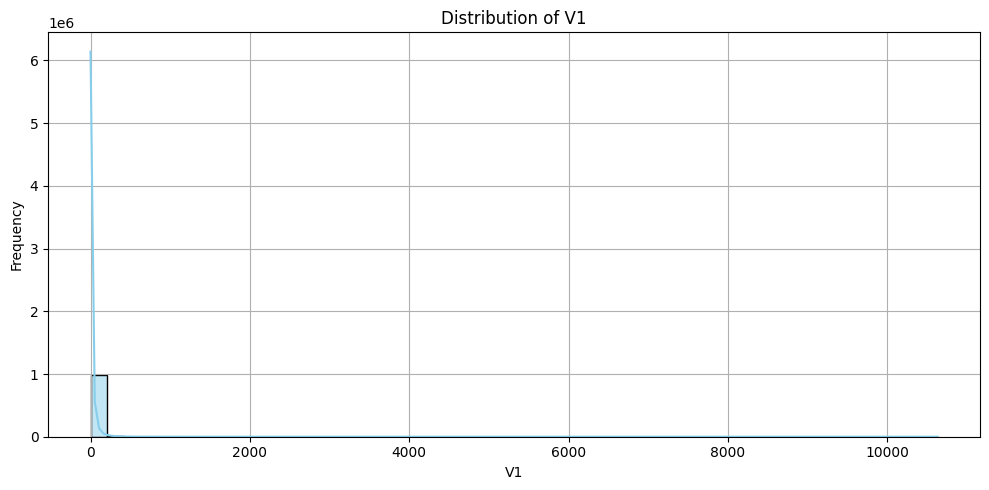

<ipython-input-5-1d9942073d52>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud', data=df, palette='Set2')


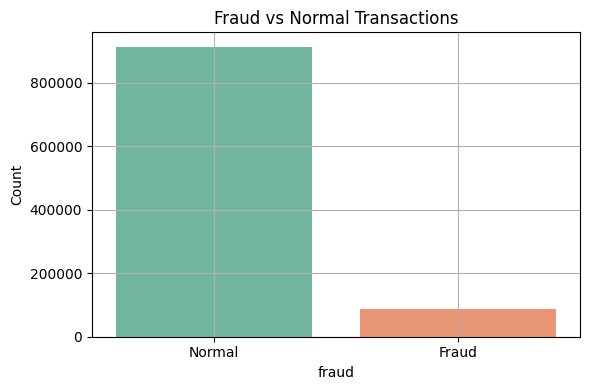


[INFO] Creating transaction graph...
[INFO] Found 541 anomalous accounts.

[RESULT] Anomalous Accounts:
Account ID: 57 | Anomalous Txns: 70 | Total Amt: 4020.426539883573
Account ID: 10 | Anomalous Txns: 194 | Total Amt: 2035.0346872567102
Account ID: 5 | Anomalous Txns: 248 | Total Amt: 1364.8588660801781
Account ID: 7 | Anomalous Txns: 216 | Total Amt: 1620.3120199006971
Account ID: 44 | Anomalous Txns: 81 | Total Amt: 3602.1887799600745
Account ID: 18 | Anomalous Txns: 151 | Total Amt: 2796.004727015619
Account ID: 8 | Anomalous Txns: 221 | Total Amt: 1874.1193672695726
Account ID: 14 | Anomalous Txns: 170 | Total Amt: 2461.5065123277313
Account ID: 13 | Anomalous Txns: 179 | Total Amt: 2413.504589050534
Account ID: 58 | Anomalous Txns: 76 | Total Amt: 4447.249070078973


In [5]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Step 2: Load the Dataset
df = pd.read_csv('Dataset.csv')
print("DataSet : ",df.head)
print(f"Dataset shape: {df.shape}")

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values in the dataset: {missing_values}")

# Display basic statistics
print(df.describe())
V1='distance_from_home'
V2='distance_from_last_transaction'

# Step 3: Visualize Transaction Patterns
plt.figure(figsize=(10, 5))
sns.histplot(df[V1], bins=50, kde=True, color='skyblue')
plt.title("Distribution of V1")
plt.xlabel("V1")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the count of fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud', data=df, palette='Set2')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.title("Fraud vs Normal Transactions")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Detect Anomalous Patterns
print("\n[INFO] Creating transaction graph...")
G = nx.DiGraph()

# Simulate account interactions using 'V1' and 'V2' features
for idx, row in df.iterrows():
    from_acc = int(row[V1]) % 1000
    to_acc = (int(row[V1]) + int(row[V2])) % 1000
    amount = row[V1]  # Using 'V1' as a proxy for transaction amount

    G.add_edge(from_acc, to_acc, weight=amount)

# Identify accounts with multiple anomalous transactions (using a threshold)
threshold = 5  # Example threshold for anomalous activity
anomalous_accounts = []
for node in G.nodes:
    transactions = [
        G.edges[node, nbr]['weight']
        for nbr in G.successors(node)
        if G.edges[node, nbr]['weight'] > threshold
    ]
    if len(transactions) >= 5:
        anomalous_accounts.append({
            'account_id': node,
            'num_anomalous_txns': len(transactions),
            'total_amt': sum(transactions)
        })

print(f"[INFO] Found {len(anomalous_accounts)} anomalous accounts.")

# Display the first 10 anomalous accounts
print("\n[RESULT] Anomalous Accounts:")
for acc in anomalous_accounts[:10]:
    print(f"Account ID: {acc['account_id']} | Anomalous Txns: {acc['num_anomalous_txns']} | Total Amt: {acc['total_amt']}")
